**Group 5 members:**

Alberto Diaz

Barbara Lorenzo

Bosco Morales

Robert Rivera

## Introduction

This assignment is about simple and multiple linear regression.

You are going to use the Diamonds data set (a csv file), which you can dowload from Canvas (_located inside the Assignment 2 section_).

Visit the following website to learn more about this data set:

https://bookdown.org/yih_huynh/Guide-to-R-Book/diamonds.html


Read the Diamonds data set as a Pandas data frame following the same steps we have followed multiple times in class.

Call this data frame __diamonds_df__

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path_diamond_dataset="/content/drive/MyDrive/CAP4631C/Datasets_CAP4631C/diamonds_data.csv"

In [7]:
import pandas as pd

In [8]:
diamonds_df= pd.read_csv(path_diamond_dataset)

We are going to remove all the qualitative variables (I want you to use only quantitative predictors for this assignment).

__AFTER you have created the diamonds_df data frame__, run the following code cell to remove all the qualitative variables from it:

In [9]:
diamonds_df.drop (['cut', 'color', 'clarity'], axis= 1, inplace= True)

You __MUST run the previous code cell__ because you CANNOT use any of the qualitative columns as predictors.

The __target (outcome) variable__ in this problem will be __price__.

__The predictors__ will be all remaning columns.

<br>

#### Question 1: Simple LR

1a) Select the best predictor that you consider should be used to run a simple regression with price as the outcome. __JUSTIFY__ your selection.

__Note:__ The justification for selecting the best predictor MUST be statistical. You should select what the best predictor is from a statistical point of view.

In [10]:
correlation_matrix = diamonds_df.corr()

print(correlation_matrix['price'])

carat    0.921591
depth   -0.010647
table    0.127134
price    1.000000
x        0.884435
y        0.865421
z        0.861249
Name: price, dtype: float64


# Justification for question 1a:
## The best predictor for this simple regression with price as the outcome is carat because it has a strong positive correlation of approximately 92%, indicating a robust linear relationship. This high correlation means that as the carat size increases, the price of the diamond also tends to increase significantly. Thus, carat effectively captures the variation in price, making it the most suitable single predictor for the model.

1b) Run a simple linear regression between price and the variable you chose in 1a). __Write the resulting equation__.


In [11]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [12]:
regression_model_carat = LinearRegression()

In [13]:
X_carat= np.array(diamonds_df['carat']).reshape(-1,1)

In [14]:
y_diamonds= diamonds_df['price']

In [15]:
regression_model_carat.fit( X_carat , y_diamonds)

LinearRegression()

In [16]:
# Intercept of the regression equation
regression_model_carat.intercept_

-2256.360580045403

In [17]:
# Slope of the regression equation
regression_model_carat.coef_

array([7756.42561797])

In [18]:
# Predicted price = -2256.36 + 7756.43 * carat

predicted_price = -2256.360580045403 + 7756.42561797 * diamonds_df['carat']

In [19]:
predicted_price

,carat
0,-472.382688
1,-627.511200
2,-472.382688
3,-6.997151
4,148.131362
...,...
53935,3328.265865
53936,3328.265865
53937,3173.137353
53938,4414.165451


In [20]:
from sklearn.metrics import r2_score

In [21]:
y_predicted_simple_reg= regression_model_carat.predict(X_carat)

In [22]:
r2_score(y_diamonds, y_predicted_simple_reg)

0.8493305264354858

1c) Let's say you want to use the Residual Standard Error (RSE) as the metric to assess the quality of the equation obtained in 1b. __Compute__ the value of RSE and, based on this value, __comment__ on the quality of the equation.

__Note__: Your commentary MUST meet the standard of a student who already took an intermediate-level Stat class and is currently taking a ML class. Making comments like this: "The value of RSE is low, so the equation is good" (__or similar superficial comments__) will NOT be considered valid and will be marked as incorrect.

In [23]:
rse_value_carat = np.sqrt ( np.sum((y_diamonds - y_predicted_simple_reg)**2) / (y_diamonds.size-1-1) )

rse_value_carat

1548.5619022985634

In [24]:
rse_value_carat / np.mean (y_diamonds)

0.3937555969784334

# Commentary for question 1c:
## The RSE value, when compared relative to the mean (39.4%), indicates that the model does not provide a highly accurate fit to the data. Although the R² score (0.849) shows that the model explains a good portion of the variance, there is still considerable unexplained variance, or "noise" in the model. In summary, while the model captures a large portion of the variance, the RSE suggests there is still significant error in the predictions. The model could be improved by including additional predictors or by adjusting for potential non-linearities in the data.

1 d) (8 points) This is a challenge question; thus, you cannot ask me for guidance on how to answer it.

Do the plot of the residuals versus the predicted values based on the model you obtained in 1 b.

What do you think about the following statement?

_The plot shows the residuals randomly varying around zero. The residuals do not show any observable pattern._


__Question__: Is the statement correct? Why or why not? __JUSTIFY__.

In [25]:
residuals_simple_reg = diamonds_df['price'] - y_predicted_simple_reg

In [26]:
import matplotlib.pyplot as plt

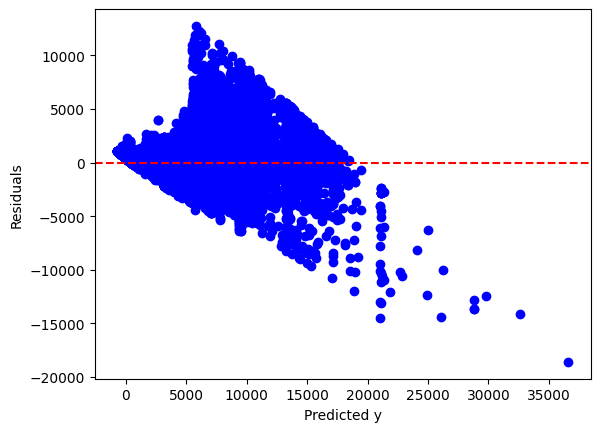

In [27]:
plt.scatter(y_predicted_simple_reg, residuals_simple_reg,c='blue')

plt.xlabel("Predicted y") # Predicted values of price obtained from the equation
plt.ylabel("Residuals")
plt.axhline(0, c='red',ls='--')
plt.show()

# Answer for question 1d:
## The residuals plot does not show a random scatter around zero. Instead, there appears to be a distinct funnel-like pattern, where the spread of residuals increases as the predicted values increase. This indicates heteroscedasticity, meaning that the variance of the residuals is not constant across all predicted values.
##Thus, the statement is incorrect because the residuals do show a non-random pattern, which violates key assumptions of linear regression, such as the independence and homoscedasticity of residuals.

#### Question 2: Multiple LR

2a) Use the ML approach to decide whether adding the predictor 'x' in the model that only includes 'carat' is beneficial. Notice that 'x' is one of the columns from the diamonds_df dataframe.


__Note__: You will get all the points if you apply the ML exactly as we did it in class. You will likely be deducted points if you follow a different procedure.


In [28]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold

In [29]:
X_mult_all = diamonds_df.drop('price', axis=1)

In [30]:
X_train, X_test, y_train, y_test= train_test_split (X_mult_all, y_diamonds, test_size= 0.2, random_state= 1)

In [31]:
# Create a KFold object with shuffling

cv_object = KFold (n_splits= 10, shuffle= True, random_state= 1)

In [32]:
# IMPORTANT: Select the predictor (s) under consideration. Since we are doing the regression with 'lstat' only, we select X_train ['carat']

mse_scores_cv_carat = - cross_val_score(LinearRegression(), np.array (X_train ['carat']).reshape(-1, 1), y_train, scoring='neg_mean_squared_error', cv= cv_object )

In [33]:
cv_mse_carat = np.mean(mse_scores_cv_carat)

cv_mse_carat

2408701.3238024134

In [34]:
# IMPORTANT: Select the predictor (s) under consideration. In this case, lstat and rm

mse_scores_cv_carat_and_x = - cross_val_score(LinearRegression(), X_train [['carat', 'x']], y_train, scoring='neg_mean_squared_error', cv= cv_object )

In [35]:
cv_mse_carat_and_x = np.mean(mse_scores_cv_carat_and_x)

cv_mse_carat_and_x

2348187.3939216193

In [36]:
(2408701.3238024134 - 2348187.3939216193) / 2408701.3238024134

0.02512305252743661

In [37]:
((2408701.3238024134 - 2348187.3939216193) / 2408701.3238024134)*100

2.512305252743661

# Reflection on question 2a:
## Although a 2.51% improvement in performance indicates some enhancement, it is not considered significant. Generally, improvements of less than 5% are regarded as minor.

2b) (10 points) This is a challenge question; thus, you cannot ask me for guidance on how to answer it.

Regardless of your decision in 2a (that is, regardless of whether you concluded that adding 'x' to the equation was beneficial) __I want you to use both 'x' and 'carat' as predictors in part b__.

__Use the equation with both 'x' and 'carat' to predict the price for 5 new diamonds.__ To do so, you need to do the following:



* Obtain the equation with these two predictors _using the training data_.


* Create 5 values for each of the two predictors. You must create values for these predictors that make sense (i.e., within the range of the values taken by each variable) and explain why you selected these values.



* Use the values you created and the equation to predict the price for these 5 new diamonds.


In [38]:
regression_final_training= LinearRegression()

In [39]:
regression_final_training.fit (X_train[['carat', 'x']], y_train)

LinearRegression()

In [40]:
y_predicted_final_test =regression_final_training.predict(X_test[['carat', 'x']])

In [41]:
# Checking the range of the predictors
diamonds_df[['carat', 'x']].describe()

,carat,x
count,53940.000000,53940.000000
mean,0.797940,5.731157
std,0.474011,1.121761
min,0.200000,0.000000
25%,0.400000,4.710000
50%,0.700000,5.700000
75%,1.040000,6.540000
max,5.010000,10.740000


In [42]:
y_predicted_final_test =regression_final_training.predict(X_test[['carat', 'x']])

In [43]:
from sklearn.metrics import mean_squared_error

In [44]:
mean_squared_error(y_test, y_predicted_final_test)

2276716.303596961

In [45]:
mean_squared_error(y_test, y_predicted_final_test, squared= False)

1508.8791547360447

In [46]:
import numpy as np

# Set random seed for reproducibility (optional)
np.random.seed(42)

# Generate 5 random values for 'carat' between the min and max
carat_values_random = np.random.uniform(diamonds_df['carat'].min(), diamonds_df['carat'].max(), 5)

# Generate 5 random values for 'x' between the min and max
x_values_random = np.random.uniform(diamonds_df['x'].min(), diamonds_df['x'].max(), 5)

print(f"Random Carat values: {carat_values_random}")
print(f"Random X values: {x_values_random}")

Random Carat values: [2.00153797 4.77293581 3.72089086 3.07954731 0.95044966]
Random X values: [1.67538115 0.62381799 9.30273181 6.45597523 7.60469949]


# Justification for selected values:
## I chose the values for 'carat' and 'x' randomly from within the range of the dataset to ensure they represent realistic diamond sizes and dimensions.

In [47]:
new_diamonds_random = pd.DataFrame({
    'carat': carat_values_random,
    'x': x_values_random
})

In [48]:
new_diamonds_random.head()

,carat,x
0,2.001538,1.675381
1,4.772936,0.623818
2,3.720891,9.302732
3,3.079547,6.455975
4,0.950450,7.604699


In [49]:
predicted_prices = regression_final_training.predict(new_diamonds_random)

In [50]:
from sklearn.metrics import mean_squared_error

In [51]:
mean_squared_error(y_test[:5], predicted_prices)

722119774.7884436

#### Question 3: Reading question (10 points)

From section 3.3.3 of the book, read the ideas discussed on the fourth bullet point (Outliers).

The last paragraph ends with this fragment:

"_However, care should be taken, since an outlier may instead indicate a
deficiency with the model, such as a missing predictor._"

__Answer two questions about this fragment__:

What do they mean when they say that an outlier may indicate a missing predictor?

What can you detect this "possible" missing predictor?

<br>

_Note_ : ChatGPT may give you the wrong answer for this one :)

# Answer for question 3

## What do they mean when they say that an outlier may indicate a missing predictor?
### When an outlier is caused by a missing predictor, it reflects a deficiency in the model’s ability to account for all factors influencing the outcome.

## What can you detect this "possible" missing predictor?
### You can detect the possibility of a missing predictor by analyzing the residuals, examining the context of the data, considering additional relevant variables, and using diagnostic techniques to evaluate the model's performance.